In [35]:
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

In [36]:
from tensorflow.keras.datasets import imdb
max_word=10000
max_sequence_length=900

In [37]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_word)

In [38]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,maxlen=max_sequence_length)

In [39]:
from keras.models import Sequential 
from keras.layers import GlobalMaxPooling1D,Embedding,Dense

In [53]:
model=Sequential()
model.add(Embedding(max_word,100,input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 900, 100)          1000000   
                                                                 
 global_max_pooling1d_3 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 64)                6464      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,008,577
Trainable params: 1,008,577
Non-trainable params: 0
____________________________________________

In [54]:
history=model.fit(x_train,y_train,epochs=2,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/2
782/782 [==============================] - 36s 43ms/step - loss: 0.4078 - accuracy: 0.8102 - val_loss: 0.2981 - val_accuracy: 0.8725
Epoch 2/2
782/782 [==============================] - 20s 25ms/step - loss: 0.2539 - accuracy: 0.8971 - val_loss: 0.2800 - val_accuracy: 0.8828


In [55]:
loss,accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.2800 - accuracy: 0.8828
0.27998486161231995
0.8827999830245972


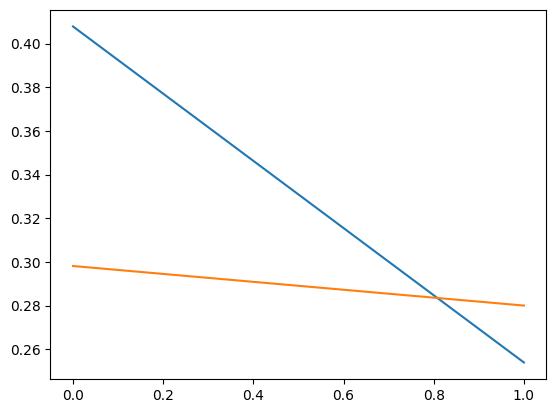

In [56]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

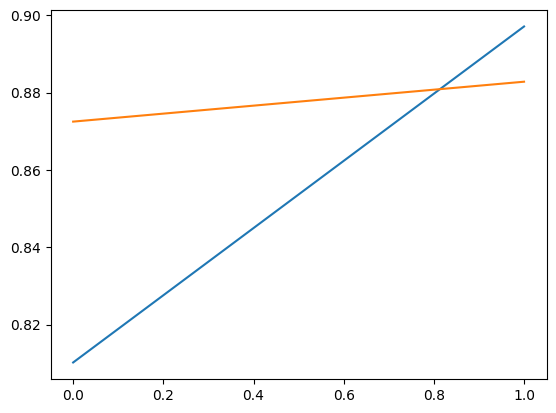

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

782/782 [==============================] - 4s 5ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



<Axes: >

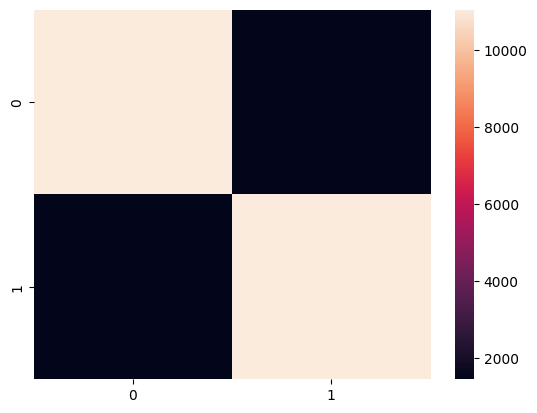

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
y_predict=model.predict(x_test)
y_predictm=(y_predict>0.5).astype(int)
print(classification_report(y_test,y_predictm))
cn = confusion_matrix(y_test,y_predictm)
sns.heatmap(cn)

In [59]:
i=5
p = x_test[i].reshape(1, -1) 
val=model.predict(p)[0][0]
val2=(val>0.5).astype(int)
print("Prediction is ","Positive" if val2==1 else "Negative")
print("Actual is ","Positive" if y_test[i]==1 else "Negative")

1/1 [==============================] - 0s 23ms/step
Prediction is  Positive
Actual is  Positive
